In [2]:
ls

adam_nowd_spectrum-00300.npz       SGD-00300_train.npz
adam_swa_nowd_spectrum-00300.npz   sgd_nowd_spectrum-00300.npz
adam_swa_weight_norm-00300.pt.npz  SGDSWA-00300-train.npz
AdamW-00300_train.npz              sgd_swa_nowd_spectrum-00300.npz
adam_weight_norm-00300.pt.npz      spectrum_plotter.ipynb
AdamWSWA-00300-train.npz


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import semicircular
import os
from scipy import optimize

In [22]:
import torch

In [23]:
plt.rcParams.update({'font.size': 12})
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=12)
from matplotlib.ticker import FormatStrFormatter



In [24]:
wns = {}

333.23654


/home/xwan/anaconda3/envs/curvature/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


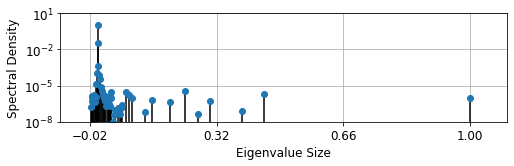

In [25]:
plt.figure(figsize=[8, 2])
a = np.load("adam_nowd_spectrum-00300.npz")
wn = np.load("weight_norms/adam_nowd_weight_norm-00300.pt.npz")['l2_norms']
wns["Adam_nowd"] = wn
print(wn)
eig = []
weight = []
for i in range(0,len(a.f.eigvals)):
    eig.append(a.f.eigvals[i,0] * wn ** 2)
    weight.append(a.f.gammas[i])
scaler = max(eig)   
eig = np.array(eig) / scaler
markerline, stemlines, baseline = plt.stem(eig, weight, '-', linefmt='black')
plt.xlabel('Eigenvalue Size')
plt.ylabel('Spectral Density')

plt.yscale('log')
plt.xscale('linear')
plt.setp(baseline, color='r', linewidth=2)
plt.rcParams["figure.figsize"] = (10,2.5)


plt.xticks(np.around(np.arange(min(eig), max(eig), (max(eig)-min(eig))/3), 2))
plt.xticks(list(plt.xticks()[0])+[max(eig)])
axes = plt.gca()
axes.set_ylim([10e-9,10])
axes.set_xlim([-0.1, 1.1])

plt.grid()

plt.show()

In [26]:
np.around(np.arange(min(eig), max(eig), (max(eig)-min(eig))/2), 1)

array([-0. ,  0.5])

35.68283


/home/xwan/anaconda3/envs/curvature/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


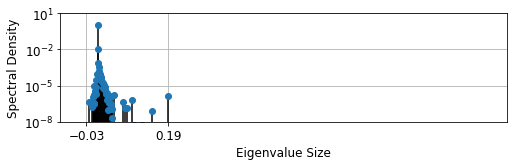

40.939175


/home/xwan/anaconda3/envs/curvature/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


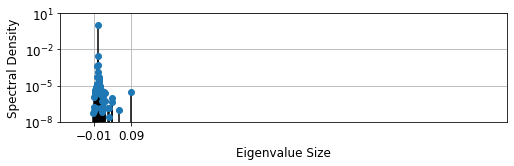

In [27]:
plt.figure(figsize=[8, 2])
a = np.load("AdamW-00300_spectrum.npz")
wn = np.load("weight_norms/adamw_weight_norm-00300.pt.npz")['l2_norms']
wns['AdamW'] = wn
print(wn)
eig = []
weight = []
for i in range(0,len(a.f.eigvals)):
    eig.append(a.f.eigvals[i,0] * wn ** 2)
    weight.append(a.f.gammas[i])
eig = np.array(eig) / scaler
markerline, stemlines, baseline = plt.stem(eig, weight, '-', linefmt='black')
plt.xlabel('Eigenvalue Size')
plt.ylabel('Spectral Density')

plt.yscale('log')
plt.xscale('linear')
plt.setp(baseline, color='r', linewidth=2)
plt.rcParams["figure.figsize"] = (10,2.5)


plt.xticks(np.around(np.arange(min(eig), max(eig)+1e-6, (max(eig)-min(eig))/1), 2))
#plt.xticks(list(plt.xticks()[0])+[max(eig)])
axes = plt.gca()
axes.set_ylim([10e-9,10])
axes.set_xlim([-0.1, 1.1])

plt.grid()

plt.show()

plt.figure(figsize=[8, 2])
a = np.load("AdamWSWA-00300-spectrum.npz")
wn = np.load("weight_norms/adamwswa_weight_norm-00300.pt.npz")['l2_norms']
wns["AdamWSWA"] = wn
print(wn)
eig = []
weight = []
for i in range(0,len(a.f.eigvals)):
    eig.append(a.f.eigvals[i,0] * wn ** 2)
    weight.append(a.f.gammas[i])
eig = np.array(eig) / scaler
markerline, stemlines, baseline = plt.stem(eig, weight, '-', linefmt='black')
plt.xlabel('Eigenvalue Size')
plt.ylabel('Spectral Density')

plt.yscale('log')
plt.xscale('linear')
plt.setp(baseline, color='r', linewidth=2)
plt.rcParams["figure.figsize"] = (10,2.5)

plt.xticks(np.around(np.arange(min(eig), max(eig)+0.00001, (max(eig)-min(eig))/1), 2))
#plt.xticks(list(plt.xticks()[0])+[max(eig)])
axes = plt.gca()
axes.set_ylim([10e-9,10])
axes.set_xlim([-0.1, 1.1])

plt.grid()



/home/xwan/anaconda3/envs/curvature/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


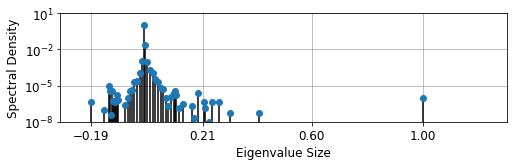

In [28]:

import torch
from models import *
model = PreResNet110.base(num_classes=100)
checkpoint = torch.load("checkpoints/sgd_nowd_checkpoint-00300.pt")
model.load_state_dict(checkpoint['state_dict'])
model.to('cuda')

w = torch.cat([param.detach().cpu().view(-1) for param in model.parameters()])
l2_norm = torch.norm(w).numpy()
wns["SGD_nowd"] = l2_norm
plt.figure(figsize=[8, 2])
a = np.load("sgd_nowd_spectrum-00300.npz")
eig = []
weight = []
for i in range(0,len(a.f.eigvals)):
    eig.append(a.f.eigvals[i,0] * l2_norm ** 2)
    weight.append(a.f.gammas[i])
scaler = np.max(eig)
eig = np.array(eig) / scaler
markerline, stemlines, baseline = plt.stem(eig, weight, '-', linefmt='black')
plt.xlabel('Eigenvalue Size')
plt.ylabel('Spectral Density')

plt.yscale('log')
plt.xscale('linear')
plt.setp(baseline, color='r', linewidth=2)
plt.rcParams["figure.figsize"] = (10,2.5)

plt.xticks(np.around(np.arange(min(eig), max(eig)+0.00001, (max(eig)-min(eig))/3), 2))
#plt.xticks(list(plt.xticks()[0])+[max(eig)])
axes = plt.gca()
axes.set_ylim([10e-9,10])
axes.set_xlim([-0.3, 1.3])

plt.grid()

plt.show()

/home/xwan/anaconda3/envs/curvature/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


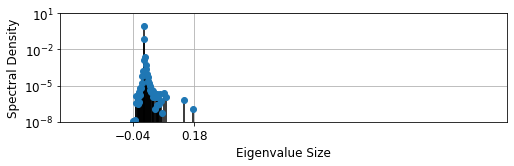

In [29]:
plt.figure(figsize=[8, 2])
a = np.load("SGD-00300_spectrum.npz")
wn = np.load("weight_norms/sgd_weight_norm-00300.pt.npz")["l2_norms"]
wns['SGD'] = wn
eig = []
weight = []
for i in range(0,len(a.f.eigvals)):
    eig.append(a.f.eigvals[i,0]  * wn ** 2)
    weight.append(a.f.gammas[i])
eig = np.array(eig) / scaler
markerline, stemlines, baseline = plt.stem(eig, weight, '-', linefmt='black')
plt.xlabel('Eigenvalue Size')
plt.ylabel('Spectral Density')

plt.yscale('log')
plt.xscale('linear')
plt.setp(baseline, color='r', linewidth=2)
plt.rcParams["figure.figsize"] = (10,2.5)

plt.xticks(np.around(np.arange(min(eig), max(eig)+0.00001, (max(eig)-min(eig))/1), 2))
#plt.xticks(list(plt.xticks()[0])+[max(eig)])
axes = plt.gca()
axes.set_ylim([10e-9,10])
axes.set_xlim([-0.3, 1.3])

plt.grid()

/home/xwan/anaconda3/envs/curvature/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


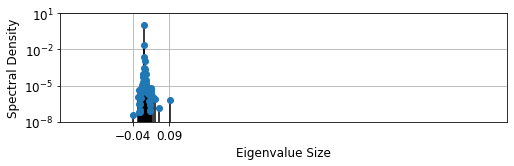

In [30]:
plt.figure(figsize=[8, 2])
a = np.load("SGDSWA-00300-spectrum.npz")
wn = np.load("weight_norms/sgd_swa_weight_norm-00300.pt.npz")["l2_norms"]
wns['SGDSWA'] = wn
eig = []
weight = []
for i in range(0,len(a.f.eigvals)):
    eig.append(a.f.eigvals[i,0]  * wn ** 2)
    weight.append(a.f.gammas[i])
eig = np.array(eig) / scaler
markerline, stemlines, baseline = plt.stem(eig, weight, '-', linefmt='black')
plt.xlabel('Eigenvalue Size')
plt.ylabel('Spectral Density')

plt.yscale('log')
plt.xscale('linear')
plt.setp(baseline, color='r', linewidth=2)
plt.rcParams["figure.figsize"] = (10,2.5)

plt.xticks(np.around(np.arange(min(eig), max(eig)+0.00001, (max(eig)-min(eig))/1), 2))
#plt.xticks(list(plt.xticks()[0])+[max(eig)])
axes = plt.gca()
axes.set_ylim([10e-9,10])
axes.set_xlim([-0.3, 1.3])

plt.grid()

OrderedDict([('mean', tensor([ 0.1912, -0.6007, -0.2567,  ...,  0.2851,  0.3710,  0.1530])), ('sq_mean', tensor([0.0368, 0.3609, 0.0660,  ..., 0.0813, 0.1377, 0.0234])), ('n_models', tensor([139])), ('base_model.conv1.weight', tensor([[[[ 1.9120e-01, -6.0066e-01, -2.5668e-01],
          [ 1.8915e-02,  4.4181e-01,  8.7639e-02],
          [-1.4760e-01,  5.0221e-01, -5.0755e-02]],

         [[ 8.3577e-02, -1.2735e+00, -2.4730e-01],
          [-1.5290e-01,  1.9583e-01,  4.4385e-01],
          [ 8.5462e-02,  6.1424e-01,  1.6063e-01]],

         [[ 3.4099e-01, -4.7690e-02, -3.7020e-02],
          [ 9.2812e-02,  2.1261e-01, -7.2139e-01],
          [-8.3793e-02,  1.5314e-01,  2.1861e-01]]],


        [[[ 2.2537e-01,  4.8074e-01, -3.4614e-01],
          [ 7.0511e-01,  1.3848e-01, -1.4042e+00],
          [ 5.1644e-01,  6.9462e-01, -4.1585e-01]],

         [[-8.9285e-02, -4.9380e-01,  2.8000e-02],
          [-2.4056e-01, -5.7144e-01,  1.2619e-01],
          [-8.5038e-03, -1.6645e-01, -1.2429e-01]

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
relarray = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275,300])
optimisers = ["Adam_nowd", "AdamW", "AdamWSWA", "SGD", "SGD_nowd", "SGDSWA"]
res = pd.DataFrame(np.nan, index=relarray, columns=optimisers)
for i in relarray:
    for optim in optimisers:
        val = "0000"+str(i) if i < 10 else "000"+str(i) if i < 100 else "00" + str(i)
        try:
            lst = np.load("loss_stats/"+optim+"/"+"lossstats-"+val+".npz")

            res.loc[i, optim] = lst['hess_var'] + lst['hess_mean_norm_sq']
        except FileNotFoundError:
            pass

In [40]:
res


,Adam_nowd,AdamW,AdamWSWA,SGD,SGD_nowd,SGDSWA
0,0.065404,0.065404,0.065404,0.065404,0.065404,0.065404
25,0.096431,0.704387,0.515538,0.001482,0.000401,0.002034
50,0.068464,0.682895,0.864642,0.001585,0.000584,0.001745
75,0.048048,0.678987,0.649279,0.001830,0.000766,0.002214
100,0.086454,0.848060,1.027781,0.001710,0.001050,0.002196
125,0.082969,0.789484,2.152917,0.002085,0.000761,0.003611
150,0.030096,1.102580,5.134196,0.002237,0.000892,0.006482
175,0.022024,1.405355,1.978418,0.002765,0.000682,0.002795
200,0.017975,3.095944,2.065109,0.003806,0.000564,0.002752
225,0.060046,9.283834,1.993094,0.006933,0.000635,0.002579


In [41]:
wns

{'Adam_nowd': array(333.23654, dtype=float32),
 'AdamW': array(35.68283, dtype=float32),
 'AdamWSWA': array(40.939175, dtype=float32),
 'SGD_nowd': array(307.3431, dtype=float32),
 'SGD': array(45.483624, dtype=float32),
 'SGDSWA': array(60.856277, dtype=float32)}

In [42]:
plt.figure(figsize=[6, 6])
for i in range(res.shape[1]):
    plt.plot(res.iloc[:, i] * (wns[res.columns[i]] ** 2), label=res.columns[i], marker="o")
    plt.yscale('log')
plt.legend()
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('$Tr(H^2)$')

Text(0, 0.5, '$Tr(H^2)$')